# Code for Section 3

This notebook produces the bias-variance figure presented in Section 3 of the paper (Figure 4)

In [1]:
"""
Necessary imports and check that relevant directories exist
"""
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.tree import DecisionTreeRegressor
from decompose import BVDExperiment
from decompose.experiments import load_results
from decompose import plotting_utils
import os

if not os.path.exists("images"):
    os.mkdir("images")
if not os.path.exists("data"):
    os.mkdir("data")


# Bias-Variance Decomposition for Regression Trees

## Figure 4

Code to generate Figure 4 from https://arxiv.org/abs/2301.03962v1.

In [3]:
import decompose.data_utils as data_utils

DATASET_NAME = "california"
N_TRIALS = 100
BOOTSTRAP = True
MAX_SAMPLES = 1.

np.random.seed(0)
train_data, train_labels, test_data, test_labels = data_utils.load_standard_dataset(DATASET_NAME,
                                                                                    0.5,
                                                                                    label_noise=0.,
                                                                                    normalize_data=True)

# Note that experiment could be sped up with use of warm_start=True here
# But was not used in the version in the paper
base_model = DecisionTreeRegressor()

bvd = BVDExperiment(base_model, "squared",
                    parameter_name="max_depth",
                    parameter_values=range(1, 31, 1),
                    bootstrap=BOOTSTRAP,
                    n_samples=MAX_SAMPLES)

results = bvd.run_experiment(train_data,
                           train_labels,
                           test_data,
                           test_labels,
                           n_trials=N_TRIALS,
                           n_test_splits=1)

results.save_results(f"data/bias_variance_trees_{DATASET_NAME}_{N_TRIALS}.pkl")

100%|██████████| 30/30 [04:10<00:00,  8.37s/it]


## Plot Results

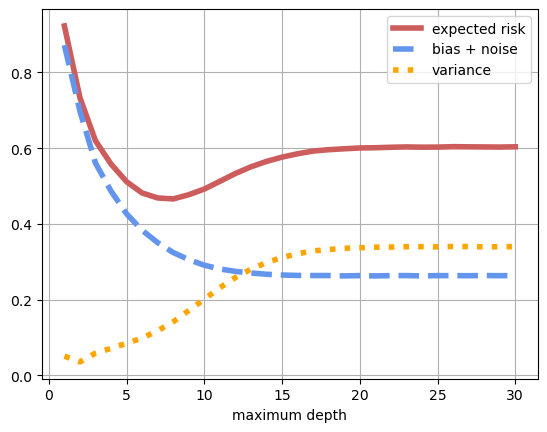

In [3]:
results = load_results(f"data/bias_variance_trees_{DATASET_NAME}_{N_TRIALS}.pkl")

fig, ax = plt.subplots()
ax = plotting_utils.plot_bv(results,
                            x_label="maximum depth",
                            y_label="",
                            axes=ax)

FIGURE_2_NAME = f"images/bv_{DATASET_NAME}_{N_TRIALS}_regression_trees.pdf"
plt.savefig(FIGURE_2_NAME, bbox_inches="tight")
plt.show()
